In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import starry
starry.config.lazy=False
from scipy.linalg import cho_factor, cho_solve

In [3]:
map=starry.Map(10)

Pre-computing some matrices... Done.


In [4]:
map.load("earth")

Compiling `render`... Done.


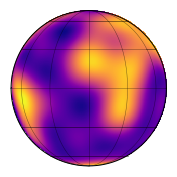

In [5]:
map.show()

Compiling `flux`... Done.
/Users/notasthma/.local/lib/python3.7/site-packages/Theano-1.0.4-py3.7.egg/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


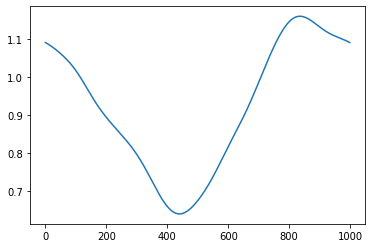

In [6]:
plt.plot(map.flux(theta=np.linspace(0, 360, 1000)))

In [7]:
A = map.design_matrix(theta=np.linspace(0, 360, 1000))

Compiling `X`... Done.


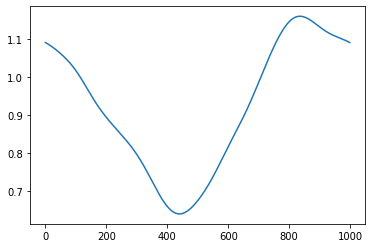

In [8]:
#A.dot(map.y)=flux


plt.plot(A.dot(map.y))


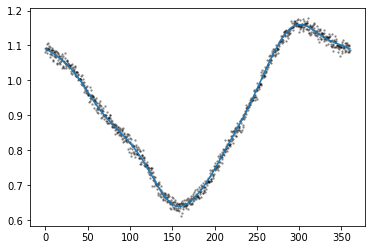

In [9]:
#adding noise to the LC

theta = np.linspace(0, 360, 1000)
flux0 = map.flux(theta=theta)
sigma = 0.01
flux = flux0 + sigma * np.random.randn(1000)

plt.plot(theta, flux, "k.", alpha=0.3, ms=3)
plt.plot(theta, flux0)

In [10]:
AT=A.T

In [26]:
lam = np.std(map.y[1:]) ** 2
lam_inv=1/lam
Lam_inv=lam_inv*np.diag(np.ones(121))
Lam_inv.shape

(121, 121)

In [30]:
var=sigma*sigma
inv_var=1/var
AT_inv_var=inv_var*AT
AT_inv_var_A=AT_inv_var.dot(A)

In [34]:
inv_sigmaY=AT_inv_var_A+Lam_inv
ATsf=AT_inv_var.dot(flux.reshape(-1,1))


In [59]:
L=cho_factor(inv_sigmaY)
y_hat=cho_solve(L,ATsf)

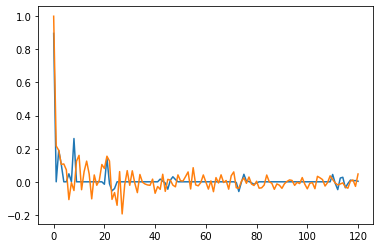

In [38]:
plt.plot(y_hat)
plt.plot(map.y)

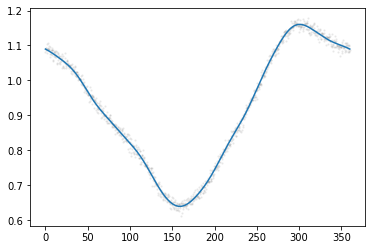

In [44]:
f_hat=A.dot(y_hat)
plt.plot(theta, flux, "k.", alpha=0.05, ms=3)
plt.plot(theta,f_hat)

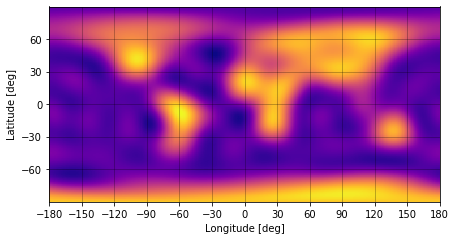

In [46]:
map.show(projection="rect")

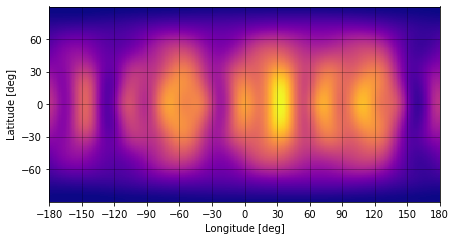

In [49]:
map[1:,:]=y_hat.flatten()[1:]
map.show(projection="rect")

In [91]:
I=np.diag(np.ones(121))
sigma_y=cho_solve(L,I)


y_sample=np.random.multivariate_normal(y_hat.flatten(), sigma_y)

In [88]:
L

(array([[ 3.00401635e+03,  1.92355191e-13,  3.46863170e+00, ...,
          6.64215308e+00,  2.08899588e-15,  9.15557619e+00],
        [ 5.77838139e-10,  1.67313902e+01, -1.99793449e-11, ...,
          7.88103584e-17, -2.00315081e-29,  1.08632582e-16],
        [ 1.04198263e+04, -3.33615005e-10,  2.45401168e+03, ...,
         -9.38837531e-03,  6.98421505e-16, -1.29409823e-02],
        ...,
        [ 1.99531365e+04,  1.27897123e-12,  3.45689449e-11, ...,
          1.69368898e+01, -6.04618267e-15, -9.05256855e-02],
        [ 6.27537779e-12,  1.61871252e-29,  1.72118049e-12, ...,
          4.27893569e-15,  1.68082624e+01,  7.17398916e-16],
        [ 2.75035006e+04,  1.76294018e-12, -5.33697977e-13, ...,
         -9.32151310e+00, -3.84504180e-14,  1.67462312e+01]]), False)

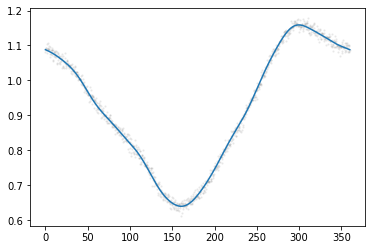

In [93]:
f_hat_sample=A.dot(y_sample)
plt.plot(theta, flux, "k.", alpha=0.05, ms=3)
plt.plot(theta,f_hat_sample)

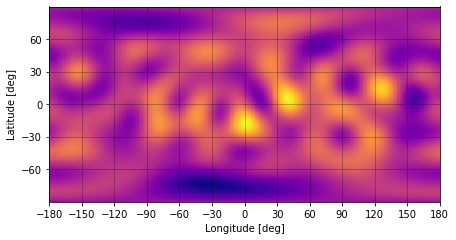

In [90]:
map[1:,:]=y_sample.flatten()[1:]
map.show(projection="rect")

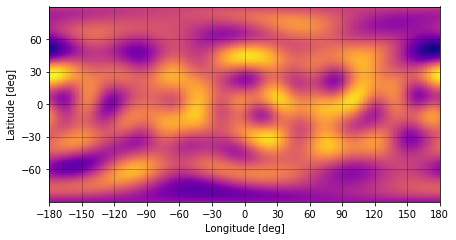

In [92]:
map[1:,:]=y_sample.flatten()[1:]
map.show(projection="rect")